In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x8124e36d60>,
 'caps': [<matplotlib.lines.Line2D at 0x81254f4430>,
 'boxes': [<matplotlib.lines.Line2D at 0x8124e36be0>],
 'medians': [<matplotlib.lines.Line2D at 0x81254f4910>],
 'fliers': [<matplotlib.lines.Line2D at 0x81254f4be0>],
 'means': []}

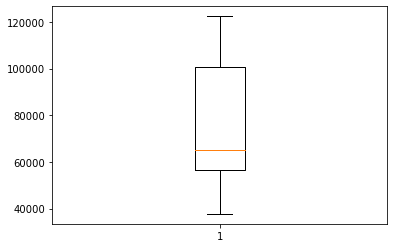

In [6]:
plt.boxplot(df["Salary"])

{'whiskers': [<matplotlib.lines.Line2D at 0x81255d0580>,
 'caps': [<matplotlib.lines.Line2D at 0x81255d0b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x81255d02b0>],
 'medians': [<matplotlib.lines.Line2D at 0x81255de100>],
 'fliers': [<matplotlib.lines.Line2D at 0x81255de3d0>],
 'means': []}

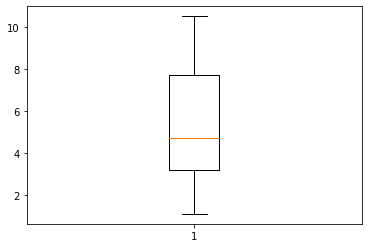

In [7]:
plt.boxplot(df["YearsExperience"])

In [8]:
x= np.array(df["YearsExperience"])

In [9]:
y= df["Salary"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


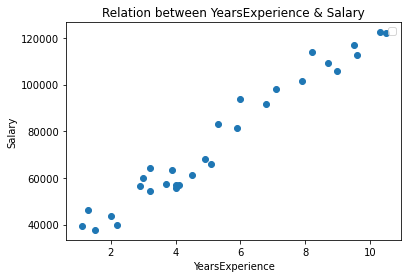

In [10]:
plt.scatter(x,y)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Relation between YearsExperience & Salary")
plt.legend()
plt.show()

In [11]:
X = x.reshape(-1,1)

In [12]:
X.shape

(30, 1)

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [14]:
model.coef_

array([9449.96232146])

In [15]:
model.intercept_

25792.20019866871

In [16]:
y_pred = model.predict(X)

In [17]:
pd.DataFrame({"Actual":y,"Predicted":y_pred,"Residual":y-y_pred})

,Actual,Predicted,Residual
0,39343.0,36187.158752,3155.841248
1,46205.0,38077.151217,8127.848783
2,37731.0,39967.143681,-2236.143681
3,43525.0,44692.124842,-1167.124842
4,39891.0,46582.117306,-6691.117306
5,56642.0,53197.090931,3444.909069
6,60150.0,54142.087163,6007.912837
7,54445.0,56032.079627,-1587.079627
8,64445.0,56032.079627,8412.920373
9,57189.0,60757.060788,-3568.060788


In [18]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,y_pred)
mse

31270951.722280968

In [19]:
from sklearn.metrics import r2_score
r2 = r2_score(y,y_pred)
r2

0.9569566641435086

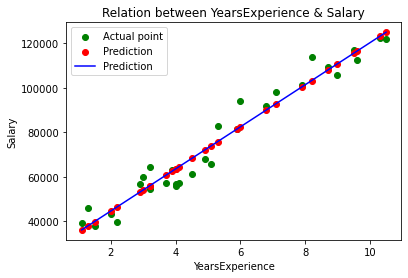

In [20]:
plt.scatter(X,y,label="Actual point",color="green")
plt.scatter(X,y_pred,label="Prediction",color="red")
plt.plot(X,y_pred,label="Prediction",color="blue")

plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Relation between YearsExperience & Salary")
plt.legend()
plt.show()